# **Day 2** - Lecture 2



## Simple Plotting


Similar to NumPy, plotting also requires a library. Here is how you import it:

In [31]:
import matplotlib.pyplot as plt

import numpy as np

So any commands we need to do with plotting will have to use `plt.` first. For now, let's just show 2 basic types of plots. Create some arbitrary x values and y values to plot. Then, it's just a matter of plugging in the values into the correct functions and displaying the graph.

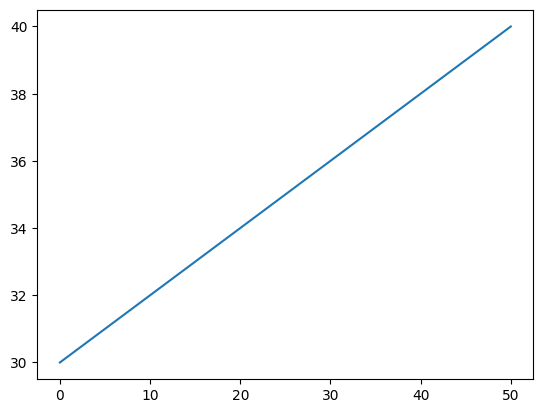

In [32]:
x = np.linspace(0, 50, 21)
y = np.linspace(30,40, 21)

#for a line plot:
plt.plot(x,y)
#display graph command
plt.show()


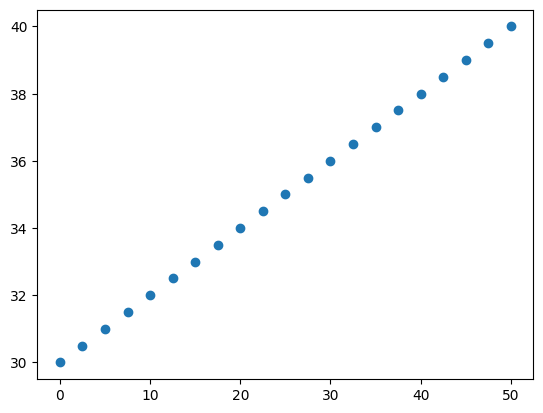

In [33]:

#for a scatter plot
plt.scatter(x, y)
#Show plot
plt.show()

## More Advanced Plotting

Let's talk briefly about some other specifications you can do with your graph.
First we can use a numpy function to load in columns of data from a txt file

In [35]:
import numpy as np
import matplotlib.pyplot as plt

year = np.loadtxt('finances.txt', skiprows=1,usecols=(0))
expenses = np.loadtxt('finances.txt', skiprows=1,usecols=(1))
profits = np.loadtxt('finances.txt', skiprows=1,usecols=(2))

gross = profits - expenses

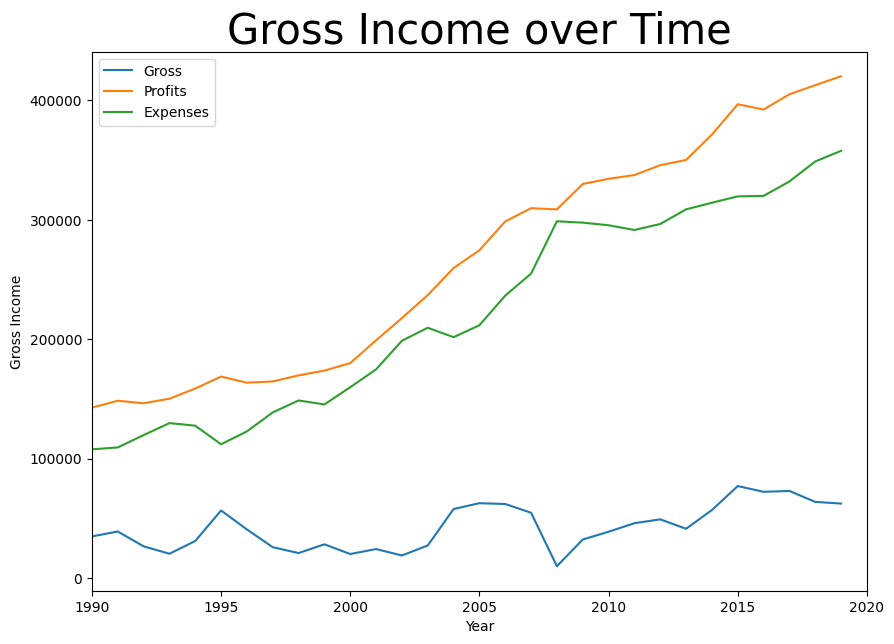

In [38]:
#You can define a given figure dimensions
plt.figure(figsize=(10,7))


#We can plot multiple data sets on the same line by using multiple plt.plot commands.
plt.plot(year, gross, label='Gross')
plt.plot(year, profits, label='Profits')
plt.plot(year, expenses, label = 'Expenses')


#plt.xlim and plt.ylim can set the range that is displayed on the graph.
#Put the bounds inside a tuple: (lowerbound, upperbound)
plt.xlim((1990,2020))


#Add a plot title with plt.title
#Note that we have to put quotes around the title in order to turn it into a string
#We can specify things like font size and location.
plt.title('Gross Income over Time',fontsize=30, fontname="Comic Sans MS")


#xlabel and ylable add axis labels.
plt.xlabel('Year')
plt.ylabel('Gross Income')


#If you have added labels to your plotted data in plt.plot, this command can add a legend.
#The location of the legend can also be specified. Check out the documentation for details.
plt.legend()
plt.show()



It is also possible to create a plot using categorical variables. Matplotlib allows you to pass categorical variables directly to many plotting functions.

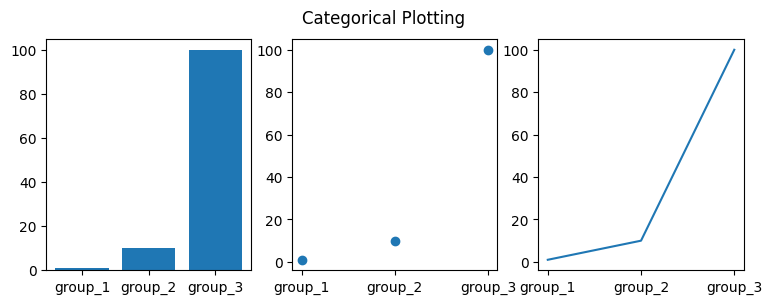

In [54]:
names = ['group_1', 'group_2', 'group_3']
values = [1, 10, 100]

plt.figure(figsize=(9, 3))

plt.subplot(131)
plt.bar(names, values)
plt.subplot(132)
plt.scatter(names, values)
plt.subplot(133)
plt.plot(names, values)
plt.suptitle('Categorical Plotting')
plt.show()

##Coding Style

There are essentially two ways to use Matplotlib:

Rely on pyplot to implicitly create and manage the Figures and Axes, and use pyplot functions for plotting.

Explicitly create Figures and Axes, and call methods on them (the "object-oriented (OO) style").



pyplot:

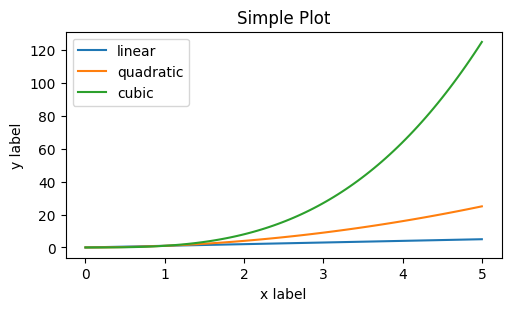

In [39]:
x = np.linspace(0, 5, 100)  # Sample data.

plt.figure(figsize=(5, 3), layout='constrained')
plt.plot(x, x, label='linear')  # Plot some data on the (implicit) axes.
plt.plot(x, x**2, label='quadratic')  # etc.
plt.plot(x, x**3, label='cubic')
plt.xlabel('x label')
plt.ylabel('y label')
plt.title("Simple Plot")
plt.legend()

OO-style

The Figure keeps track of all the child Axes, a group of 'special' Artists (titles, figure legends, colorbars, etc), and even nested subfigures.

In [ ]:
fig = plt.figure()  # an empty figure with no Axes
fig, ax = plt.subplots()  # a figure with a single Axes
fig, axs = plt.subplots(2, 2)  # a figure with a 2x2 grid of Axes

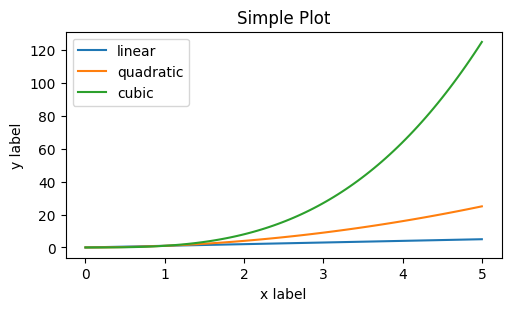

In [44]:
x = np.linspace(0, 5, 100)  # Sample data.

# Note that even in the OO-style, we use `.pyplot.figure` to create the Figure.
fig, ax = plt.subplots(figsize=(5, 3), layout='constrained')
ax.plot(x, x, label='linear')  # Plot some data on the axes.
ax.plot(x, x**2, label='quadratic')  # Plot more data on the axes...
ax.plot(x, x**3, label='cubic')  # ... and some more.
ax.set_xlabel('x label')  # Add an x-label to the axes.
ax.set_ylabel('y label')  # Add a y-label to the axes.
ax.set_title("Simple Plot")  # Add a title to the axes.
ax.legend()  # Add a legend.

#Color mapped data and Subplots

Often we want to have a third dimension in a plot represented by a colors in a colormap. Matplotlib has a number of plot types that do this:

Text(0.5, 1.0, 'imshow() with LogNorm()')

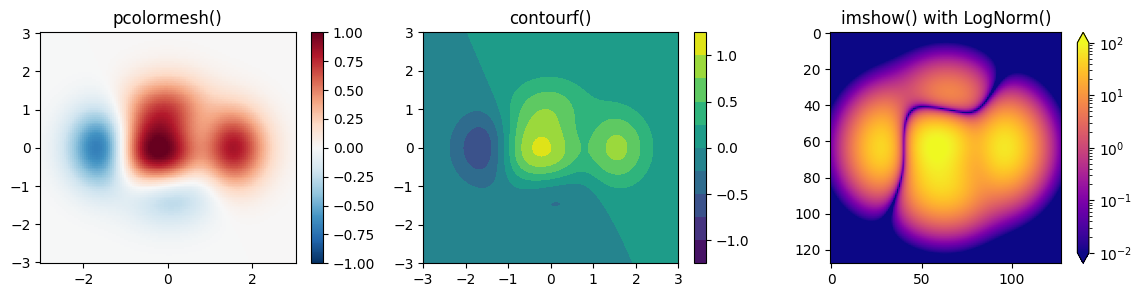

In [53]:
import matplotlib as mpl

X, Y = np.meshgrid(np.linspace(-3, 3, 128), np.linspace(-3, 3, 128))
Z = (1 - X/2 + X**5 + Y**3) * np.exp(-X**2 - Y**2)

fig, axs = plt.subplots(1, 3, figsize=(14,3))
pc = axs[0].pcolormesh(X, Y, Z, vmin=-1, vmax=1, cmap='RdBu_r')
fig.colorbar(pc, ax=axs[0])
axs[0].set_title('pcolormesh()')

co = axs[1].contourf(X, Y, Z, levels=np.linspace(-1.25, 1.25, 11))
fig.colorbar(co, ax=axs[1])
axs[1].set_title('contourf()')

pc = axs[2].imshow(Z**2 * 100, cmap='plasma',
                          norm=mpl.colors.LogNorm(vmin=0.01, vmax=100))
fig.colorbar(pc, ax=axs[2], extend='both')
axs[2].set_title('imshow() with LogNorm()')
